# Прогнозы и предсказания.

# Описание проекта

Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.

# Содержание

1. **[Загрузиет данные](#step1_0)**


2. **[Проведите исследовательский анализ данных (EDA)](#step2_0)**

    2.1 [Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения](#step2_1)
    
    2.2 [Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался ](#step2_2)
    
    2.3 [Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#step2_3)
    
    2.4 [Постройте матрицу корреляций и отобразите её.](#step2_4)
    
    
3. **[Постройте модель прогнозирования оттока клиентов. Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:](#step3_0)**

    3.1 [Разбейте данные на обучающую и валидационную выборку](#step3_1)
    
    3.2 [Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом.](#step3_2)
    
    3.3[Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?](#step3_3)
    
    
4. **[Сделайте кластеризацию клиентов](#step4_0)**

    4.1 [Стандартизируйте данные.](#step4_1)
    
    4.2 [Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.](#step4_2)
    
    4.3 [Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы результаты можно было сравнивать с результатами остальных студентов.](#step4_3)
    
    4.4 [Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#step4_4)
    
    4.5 [Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?](#step4_5)
    
    4.6 [Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#step4_6)
    
    
5. **[Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#step5_0)**

 

# 1. Загрузка данных. <a id="step1_0"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1555,1,1,1,1,1,1,0,28,328.664402,1.0,1,1.870634,1.223711,1
2601,0,1,0,0,1,1,0,28,80.893948,1.0,2,0.547046,0.318290,1
944,1,1,0,0,1,12,0,37,299.179537,12.0,2,1.786169,1.732090,0
2152,1,1,1,1,1,12,0,32,242.040987,11.0,0,3.142519,3.057465,0
3373,0,1,1,1,1,12,1,27,40.234518,9.0,1,2.208049,2.253743,0
911,0,0,0,0,1,1,0,32,243.777010,1.0,2,0.643102,0.116537,1
1778,0,1,1,1,1,6,1,31,55.587565,6.0,6,2.296724,2.171892,0
669,1,1,1,1,1,1,1,29,54.991552,1.0,5,2.157268,2.170586,0
2271,1,1,1,1,1,1,1,26,156.933060,1.0,4,1.019928,0.912407,0
2651,0,1,0,0,1,1,0,31,173.117644,1.0,3,1.299477,1.305000,0


In [3]:
# приведем названия столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)

# 2. Проведите исследовательский анализ данных (EDA). <a id="step2_0"></a>

# 2.1 Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения<a id="step2_1"></a>

In [4]:
# Пропуски отсутствуют
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# 2.2 Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался<a id="step2_2"></a>

In [6]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По всем фичам стреднее значение тех кто остался выше, чем тех кто ушел. Ну, кроме пола, разница мизерная.

# 2.3 Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)<a id="step2_3"></a>

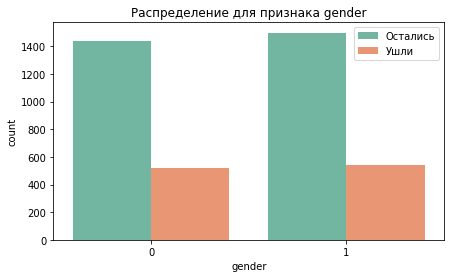

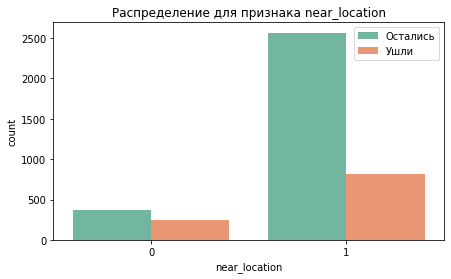

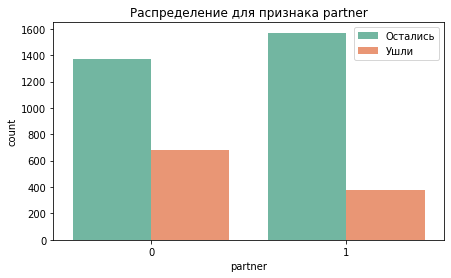

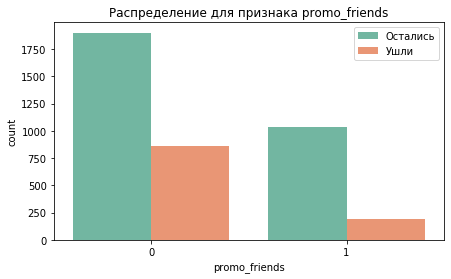

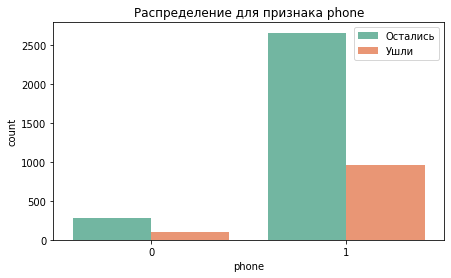

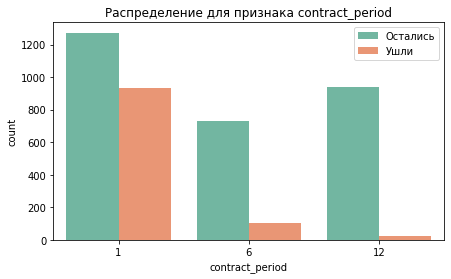

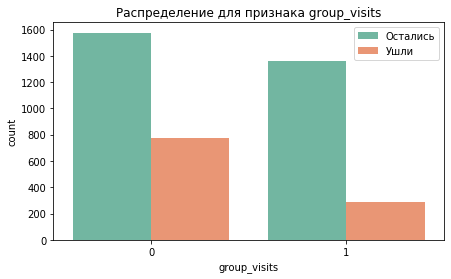

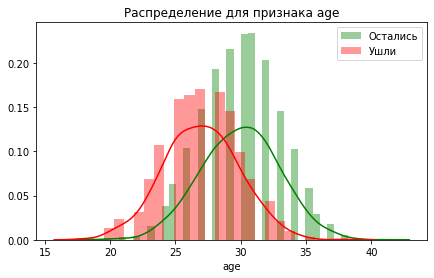

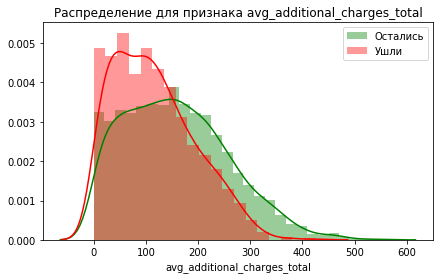

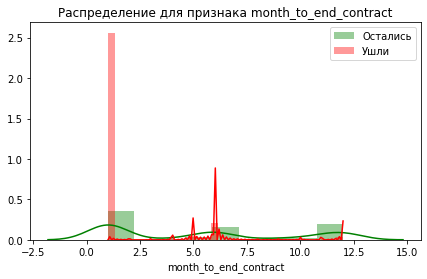

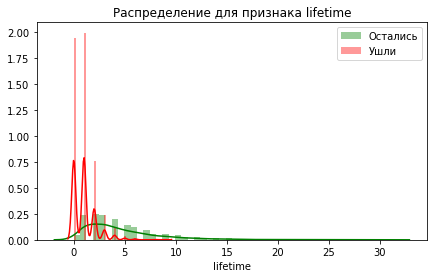

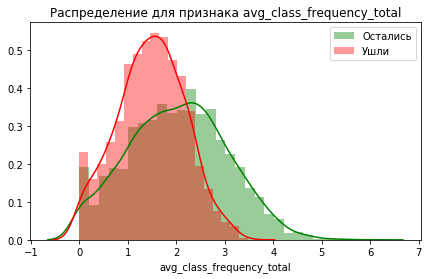

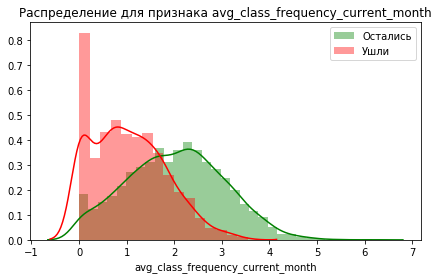

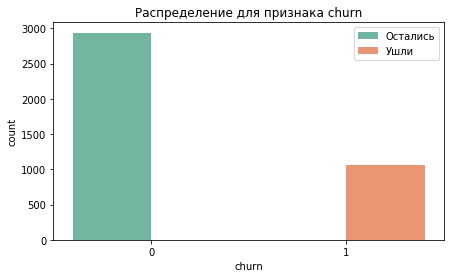

In [7]:
for col in df.columns:
    if len(df[col].unique()) > 3:
        plt.figure(figsize=(7, 4))
        sns.distplot(df.query('churn == 0')[col],color='g')
        sns.distplot(df.query('churn == 1')[col], color='r')
        plt.legend(labels = ('Остались', 'Ушли'))
        plt.title('Распределение для признака ' + col)
        plt.show()
    else:
        plt.figure(figsize=(7, 4))
        sns.countplot(x=col, hue='churn', data=df, palette='Set2')
        plt.legend(labels = ('Остались', 'Ушли'))
        plt.title('Распределение для признака ' + col)
        plt.show()

Основные моменты, которые можно выделить:
* Сотрудники компании-партнера клуба чаще отсаются.
* Те, кто покупают абонемент на один месяц чаще уходят, как и те, кто только недавно стал посещать центр.
* Те, кто посещают групповые занятия чаще остаются.
* Так же видно что молодые чаще уходят.
* Лояльные клиенты тратят больше на доп. услуги.
* Средняя частота посещений у лояльных клиентов больше.

# 2.4 Постройте матрицу корреляций и отобразите её.<a id="step2_4"></a>

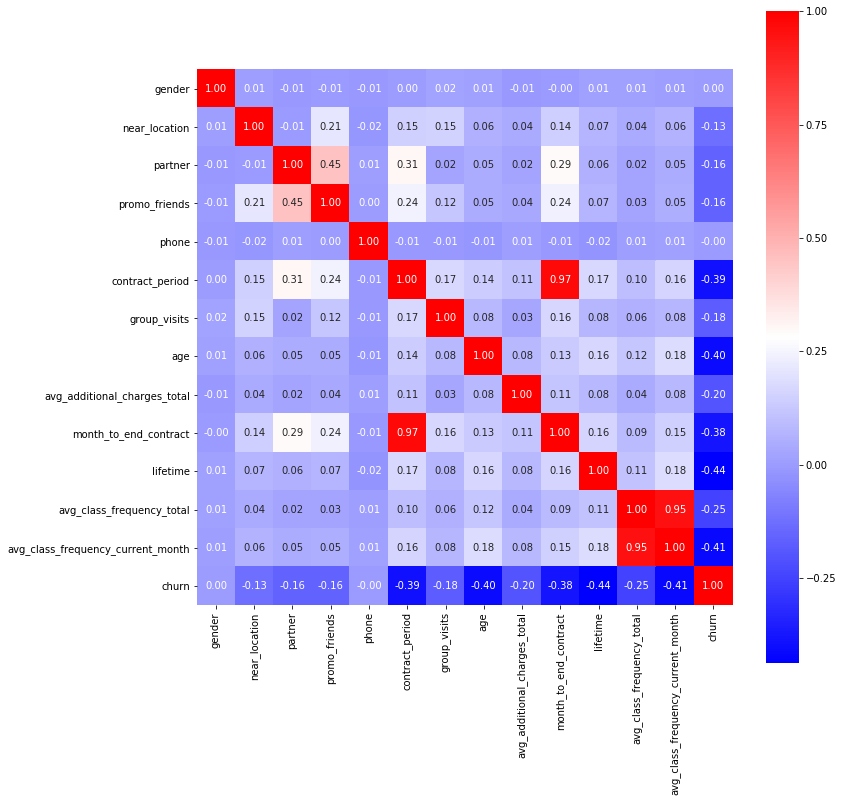

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True, square=True, fmt = '.2f', cmap='bwr');

Сильно коррелируют признаки средней частоты посещений в неделю за **все время** и за **предыдущй месяц**, а так же срок до **окончания дейстия текущего абонемента** и срок **доительность текущего абонемента**.



# 3. Постройте модель прогнозирования оттока клиентов.<a id="step3_0"></a>

# 3.1 Разбейте данные на обучающую и валидационную выборку<a id="step3_1"></a>

In [9]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Супер, данные разделены верно! Очень круто, что ты знаешь про аргумент <code>stratify</code> - очень грамотное решение для наличия дисбаланса классов</div> <br>

# 3.2 Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом.<a id="step3_2"></a>

In [10]:
lg = LogisticRegression(solver='liblinear', random_state = 8)
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
lg_proba = lg.predict_proba(X_test)[:,1]

In [11]:
# Напишем функция для вывода всех метрик.
def print_all_metrics(y_true, y_pred, y_proba):
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [12]:
print_all_metrics(y_test, lg_pred, lg_proba)

	Accuracy: 0.93
	Precision: 0.91
	Recall: 0.82
	F1: 0.86
	ROC_AUC: 0.97


In [13]:
rfc = RandomForestClassifier(random_state = 0)

In [14]:
# этого нет в задании, но я все же попробую :)
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': np.arange(100,501,100),
    'max_depth': np.arange(5, 11)
}

In [15]:
import warnings
warnings.filterwarnings("ignore")
gs = GridSearchCV(rfc, params, 'roc_auc', cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [16]:
gs.best_score_, gs.best_params_

(0.9723593668142666,
 {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300})

In [15]:
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 10, random_state = 0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:,1]

In [16]:
print_all_metrics(y_test, rfc_pred, rfc_proba)

	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.81
	F1: 0.84
	ROC_AUC: 0.97


Precision и Recall, как и F1 и Accuracy лучше оказались у логистической регрессии.

Дальше я чисто для себя решил проверить другие модели регрессии, с которыми знаком

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param = {'n_neighbors': range(1, 21)}
gs = GridSearchCV(model, param, 'f1', cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 21)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [22]:
gs.best_score_, gs.best_params_

(0.7419623931187307, {'n_neighbors': 13})

In [23]:
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),\
precision_score(y_test, model.predict(X_test)),\
recall_score(y_test, model.predict(X_test)),\
f1_score(y_test, model.predict(X_test))

(0.86875, 0.7772020725388601, 0.7075471698113207, 0.7407407407407407)

In [26]:
from sklearn.svm import SVC
model = SVC()
param = {
    'C':[0.1, 1, 10, 100, 1000],
    'degree':[1, 2, 3, 4]
}
gs = GridSearchCV(model, param, scoring= 'f1', cv=5)
 
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [27]:
gs.best_score_, gs.best_params_

(0.7400672515993, {'C': 100, 'degree': 1})

In [25]:
from sklearn.svm import SVC
model = SVC(C = 100, degree = 1, random_state=8)
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),\
precision_score(y_test, model.predict(X_test)),\
recall_score(y_test, model.predict(X_test)),\
f1_score(y_test, model.predict(X_test))

(0.84, 0.7359550561797753, 0.6179245283018868, 0.6717948717948717)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),\
precision_score(y_test, model.predict(X_test)),\
recall_score(y_test, model.predict(X_test)),\
f1_score(y_test, model.predict(X_test))

(0.8675, 0.7022900763358778, 0.8679245283018868, 0.7763713080168776)

Все равно лгистическая регрессия показала себя лучше всех :)

# 4. Сделайте кластеризацию клиентов <a id="step4_0"></a>

# 4.1 Стандартизируйте данные.<a id="step4_1"></a>

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# 4.2 Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.На основании полученного графика предположите, какое количество кластеров можно выделить.<a id="step4_2"></a>

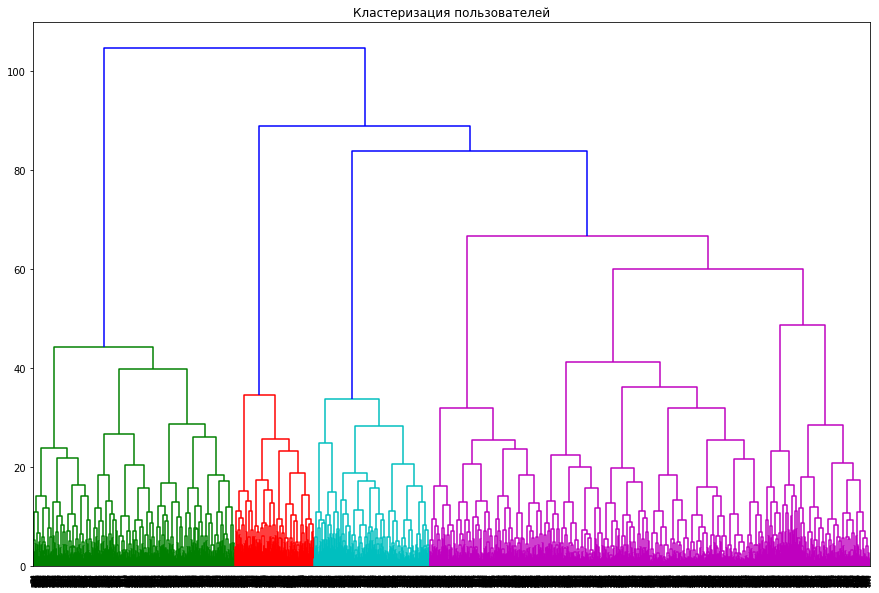

In [31]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

# 4.3 Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.<a id="step4_3"></a>

In [28]:
km = KMeans(n_clusters = 5, random_state=8)
labels = km.fit_predict(x_sc)
df['cluster'] = labels

# 4.4 Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?<a id="step4_4"></a>

In [29]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.522078,0.497326,0.510204,0.477934,0.560770
near_location,0.862338,0.942246,0.748724,0.809390,0.865223
partner,0.470130,0.750802,1.000000,0.000000,0.336943
promo_friends,0.306494,0.541176,0.451531,0.086385,0.197353
phone,0.000000,1.000000,1.000000,1.000000,0.998797
contract_period,4.787013,11.364706,2.554847,1.859155,2.735259
group_visits,0.425974,0.563636,0.302296,0.321127,0.456077
age,29.301299,29.989305,28.505102,28.139906,30.203369
avg_additional_charges_total,143.957664,164.151821,130.116397,131.136778,165.099078
month_to_end_contract,4.475325,10.389305,2.368622,1.782160,2.525872


Сразу можно обратить внимание, что наименьший отток клиентов в кластере **1** и **4**, а так же то, что все находящиеся в кластере **3** не являются сотрудниками компании-партнера клуба, и то, что алгоритм выделил в отдельный кластер **4** практически всех, у кого отсутствует контактный номер.

# 4.5 Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?<a id="step4_5"></a>

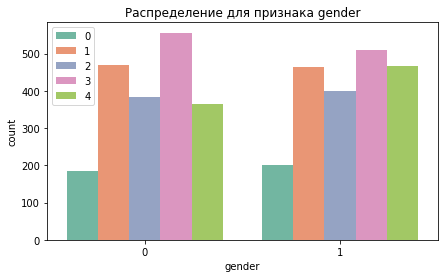

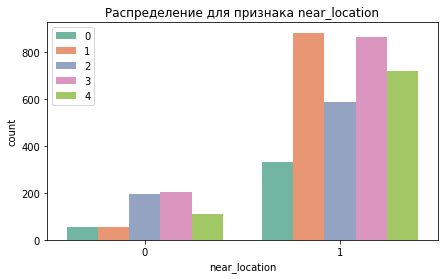

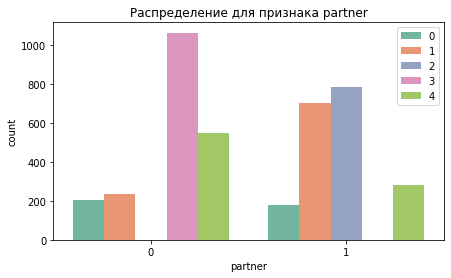

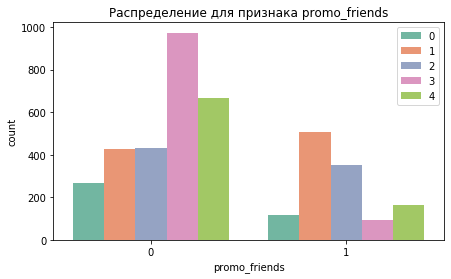

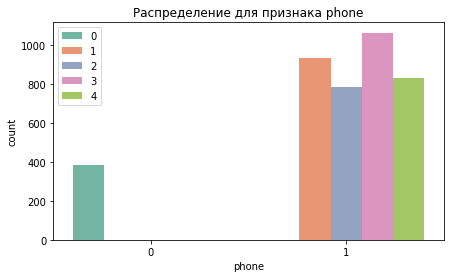

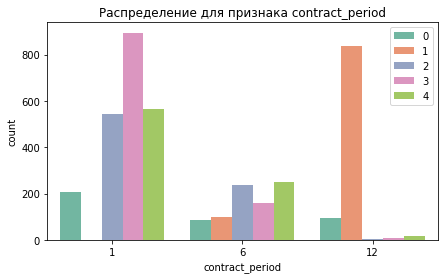

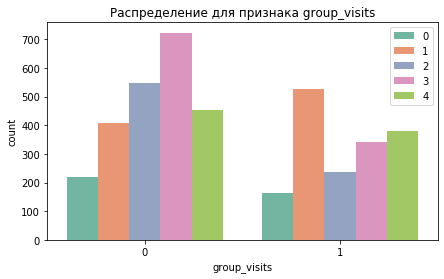

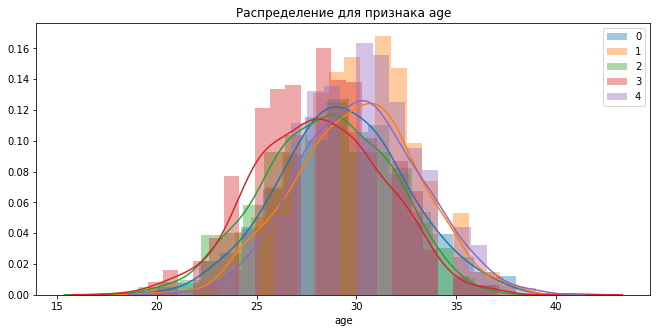

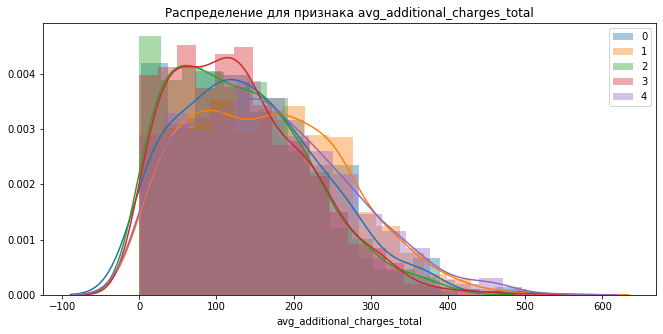

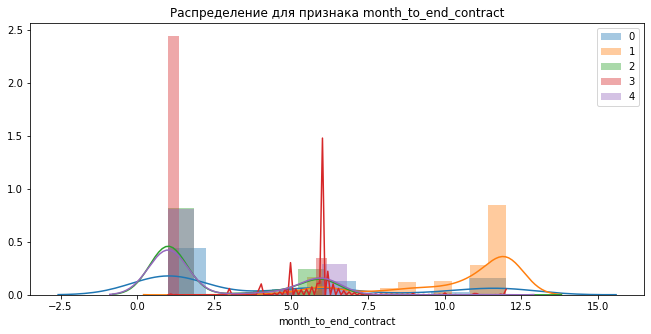

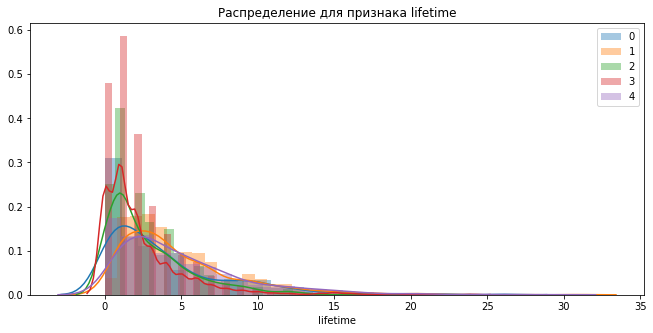

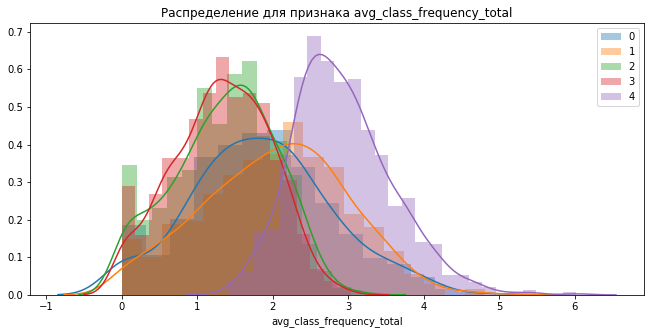

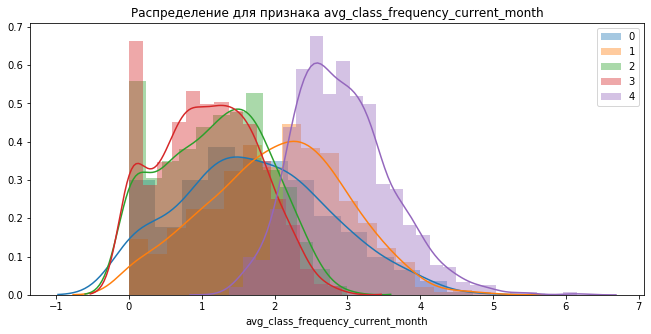

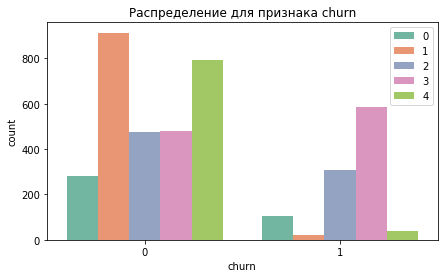

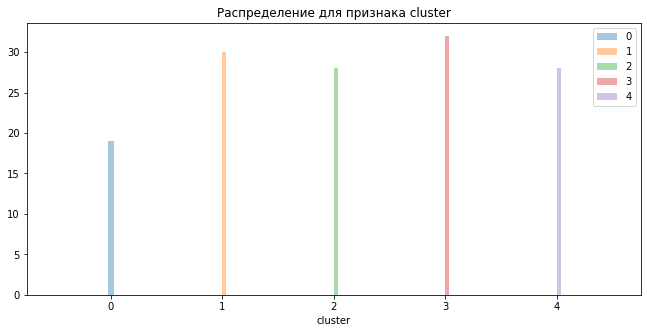

In [30]:
for col in df.columns:
    if len(df[col].unique()) > 3:
        plt.figure(figsize=(11, 5))
        for i in range(0,5):
            sns.distplot(df.query('cluster == @i')[col])
            plt.legend(labels = ('0', '1', '2','3','4'))
            plt.title('Распределение для признака ' + col)
    else:
        plt.figure(figsize=(7, 4))
        sns.countplot(x=col, hue='cluster', data=df, palette='Set2')
        plt.legend(labels = ('0', '1', '2','3','4'))
        plt.title('Распределение для признака ' + col)
        plt.show()

В целом можно сделать те же выводы, что и по сводной талице из предылущего пункта.

Так же можно добавить что что в **1** кластере в основном клиенты, которые купили абонемент на весь год сращу.

# 4.6 Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?<a id="step4_6"></a>

In [31]:
df.groupby('cluster')['churn'].mean()

cluster
0    0.267532
1    0.023529
2    0.394133
3    0.551174
4    0.048135
Name: churn, dtype: float64

Как было отмечено ранее, в кластерах **1** и **4** находятся наименее лояльные клиенты. Самые лояльные в кластере **3**

# 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами <a id="step5_0"></a>

**В целом можно сделать следующие выводы:**

Стоит обратить внимание на тех, кто недавно начал посещать фитнес-центр, и покупает абонемент на 1 месяц, они склонны к уходу. Их следуеть привлекать различными предложениями для "новичков": скидки на первую покупку, например 3 месяца по цене одного. Или бесплатное посещение первых 2-3 плтаных занятий, так они лучше познакомятся со всеми возможностями центра. Но не стоит забывать и про "старичков" которые давно посещают фитнес-центр, которых алгоритм определил в целый отдельный кластер, и тратят на доп.услуги они больше остальных, им тоже следует разработать индивидуальные предложения. Раличные бонусы и скидки их так же порадуют. Не плохо было бы увеличить количество компаний-партнеров, сотрудники таких компаний гораздо чаще остаются. И самое главное: выстроить предиктивную схему аналитики, что бы предсказывать и находить тех клиентов, которые склонны уйти, но пока еще остаются пользователмя фитнес-клуба.